In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_excel("dataset_new.xlsx")
df.head()

,Tgl/bln/thn,suhu,kelembaban_udara,tekanan_udara,arah_angin,kecepatan_angin,curah_hujan
0,2020-01-01,18.9,91,1021.0,35,7,0.01
1,2020-01-02,17.9,90,1022.2,20,6,0.01
2,2020-01-03,18.5,95,1021.4,20,5,0.01
3,2020-01-04,18.8,93,1019.6,25,6,3.10
4,2020-01-05,19.1,87,1019.3,35,5,0.01


In [26]:
df.describe()

,suhu,kelembaban_udara,tekanan_udara,arah_angin,kecepatan_angin,curah_hujan
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,19.383889,89.005556,1018.529762,167.523810,5.346825,5.921063
std,0.996261,6.899653,1.275521,99.477037,1.792987,10.812391
min,12.100000,24.000000,1014.900000,0.000000,2.000000,0.000000
25%,18.700000,86.000000,1017.600000,43.000000,4.000000,0.000000
50%,19.400000,90.000000,1018.500000,210.000000,5.000000,1.000000
75%,20.000000,93.000000,1019.400000,230.000000,6.000000,7.000000
max,23.900000,100.000000,1022.600000,360.000000,20.000000,90.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tgl/bln/thn       1260 non-null   datetime64[ns]
 1   suhu              1260 non-null   float64       
 2   kelembaban_udara  1260 non-null   int64         
 3   tekanan_udara     1260 non-null   float64       
 4   arah_angin        1260 non-null   int64         
 5   kecepatan_angin   1260 non-null   int64         
 6   curah_hujan       1260 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 69.0 KB


In [28]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

Tgl/bln/thn         0
suhu                0
kelembaban_udara    0
tekanan_udara       0
arah_angin          0
kecepatan_angin     0
curah_hujan         0
dtype: int64

In [30]:
df.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_26920\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


suhu               -0.002543
kelembaban_udara   -1.734664
tekanan_udara       0.121083
arah_angin         -0.344200
kecepatan_angin     1.385576
curah_hujan         2.938474
dtype: float64

In [31]:
df.kurt()

C:\Users\User\AppData\Local\Temp\ipykernel_26920\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


suhu                 2.641282
kelembaban_udara     8.023109
tekanan_udara       -0.195537
arah_angin          -1.038373
kecepatan_angin      4.325761
curah_hujan         10.732207
dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_26920\4287549212.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_26920\4287549212.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

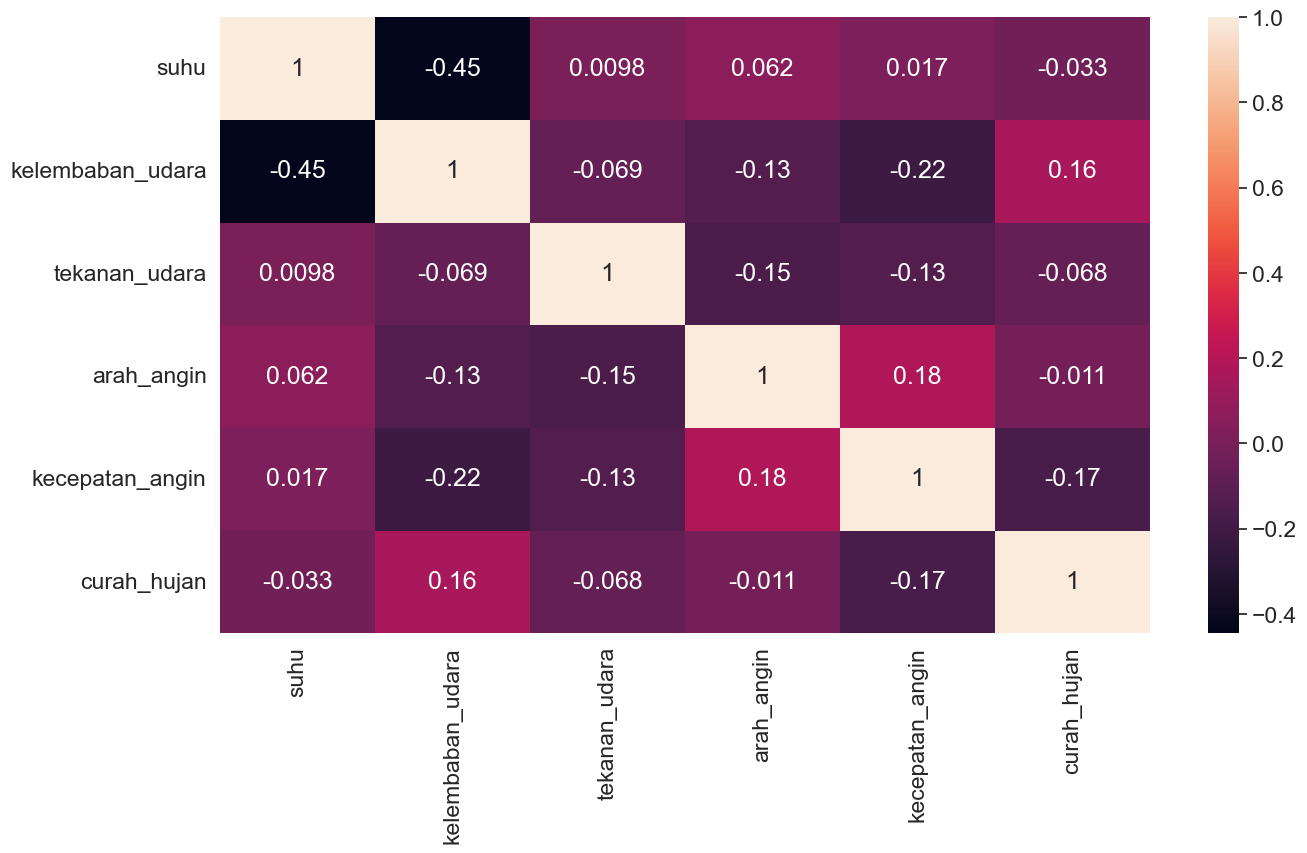

In [32]:
df.corr()
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
sns.heatmap(df.corr(), annot = True)

In [33]:
x = df.iloc[:,1:6].values
y = df['curah_hujan'].values
y

array([0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ])

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
xscaled

array([[0.57627119, 0.88157895, 0.79220779, 0.09722222, 0.27777778],
       [0.49152542, 0.86842105, 0.94805195, 0.05555556, 0.22222222],
       [0.54237288, 0.93421053, 0.84415584, 0.05555556, 0.16666667],
       ...,
       [0.66949153, 0.88157895, 0.37662338, 0.58333333, 0.33333333],
       [0.65254237, 0.92105263, 0.41558442, 0.11111111, 0.16666667],
       [0.74576271, 0.63157895, 0.53246753, 0.72222222, 0.38888889]])

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size=0.2, random_state=42)
print("Jumlah Data Training = ", xtrain.shape)
print("Jumlah Data Testing = ", xtest.shape)

Jumlah Data Training =  (1008, 5)
Jumlah Data Testing =  (252, 5)


In [1]:
model.evaluate(xtest, ytest)

In [2]:
# Melakukan prediksi pada data baru
predictions = model.predict(X_test_scaled)

In [68]:
best_model = grid_result.best_estimator_
pred = best_model.predict(xtest)
print(pred)

[ 0.05652281  0.05441045  0.07448448  0.11589035  0.12693581  0.04831793
  0.08794376  0.10091922  0.06809666  0.11019177  0.0788062   0.03689894
  0.10703671  0.05867406  0.08203349  0.11454241  0.04894706  0.09440641
  0.10401843  0.06497132  0.08368805  0.06010636  0.08703613  0.09702983
  0.07411331  0.07014122  0.0990405   0.06753029  0.08934948  0.08179822
  0.08825587  0.08095659  0.08140108  0.08971732  0.06344404  0.08135602
  0.02437837  0.0836848   0.08176105  0.07424196  0.037661    0.10736521
  0.08748156  0.08599803  0.12499308  0.08280647  0.05061787  0.09694817
  0.07807317  0.05327928  0.08565941  0.02974391  0.0352007   0.07026029
  0.11789661  0.08340531  0.07246584  0.13115202  0.1248658   0.13220119
  0.04843423  0.07391335  0.10649242  0.01420761  0.06024751  0.13185597
  0.1012442   0.11372148  0.07830814  0.07996321  0.11187876  0.05582044
  0.09604136  0.09236214  0.03139009  0.03276526  0.10443358  0.11431414
  0.12463985  0.11492601  0.12492956  0.0590839   0

# 1.1 Pembangunan Model menggunakan Parameter Hasil Tuning Manual

Epoch 1/3000, Train Loss: 0.28072176301603885, Validation Loss: 0.2737331821987401, Train RMSE: 0.31354571939705084, Validation RMSE: 0.30515027740605677
Epoch 2/3000, Train Loss: 0.14688719470257833, Validation Loss: 0.14899184590330591, Train RMSE: 0.16716266916151096, Validation RMSE: 0.16800544119901947
Epoch 3/3000, Train Loss: 0.20665799164769405, Validation Loss: 0.21234031273759713, Train RMSE: 0.21969520320474972, Validation RMSE: 0.22266369345763476
Epoch 4/3000, Train Loss: 0.17447415820982454, Validation Loss: 0.17873382557408465, Train RMSE: 0.18784343594583564, Validation RMSE: 0.1899411612961456
Epoch 5/3000, Train Loss: 0.12734008751727174, Validation Loss: 0.1284919850528844, Train RMSE: 0.14504491760375265, Validation RMSE: 0.14430022133213877
Epoch 6/3000, Train Loss: 0.08921949511320075, Validation Loss: 0.08654461170582933, Train RMSE: 0.12292370553024305, Validation RMSE: 0.11816665525842322
Epoch 7/3000, Train Loss: 0.07485918628481832, Validation Loss: 0.0699113

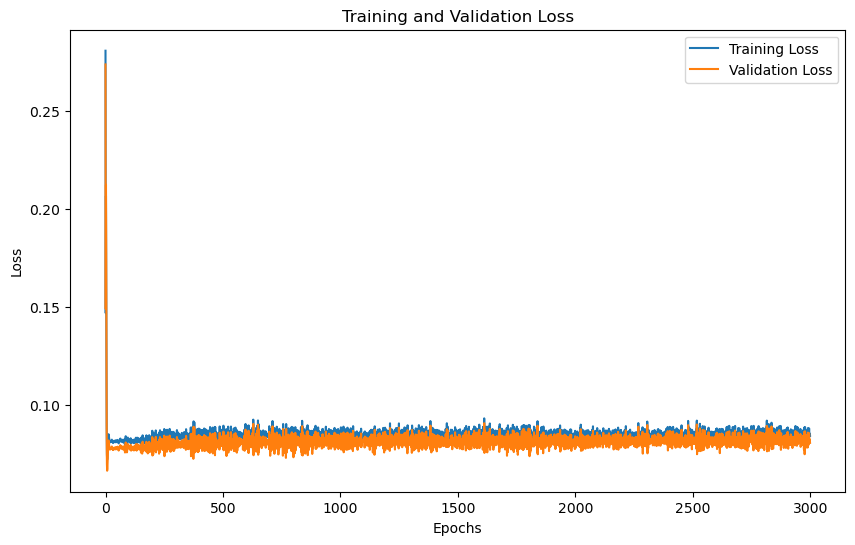

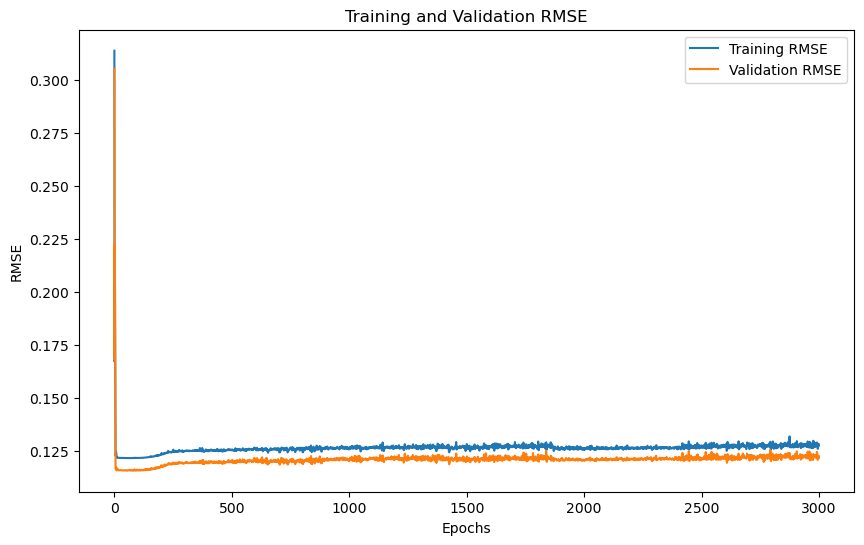

Training set RMSE: 0.12782803441955373
Test set RMSE: 0.12203642570388004


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_excel('dataset_ta.xlsx')

# Drop kolom waktu
data = data.drop(columns=["Tgl/bln/thn"])

# Kolom target bernama 'curah_hujan' yang di drop di variabel x dan fitur-fiturnya adalah semua kolom yang tidak di drop pada variabel x.
X = data.drop(columns=['curah_hujan'])
y = data['curah_hujan']

# Normalisasi fitur-fitur dan target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Tentukan parameter terbaik yang diperoleh dari proses tuning parameter.
best_params = {
    'hidden_layer_sizes': (6, 7, 8),  
    'learning_rate_init': 0.01,  
    'max_iter': 3000               
}

# Tentukan model dengan parameter terbaik dari kode **best_params yang diambil dari parameter yang di tentukan di potongan kode program sebelumnya.
best_model = MLPRegressor(**best_params, solver='adam', warm_start=True)

# Bagi data menjadi set pelatihan dan set pengujian dengan train_test_split dan test_size 0.3 yang didapatkan dari tuning parameter.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Inisialisasi list untuk menyimpan loss dan RMSE
train_losses = []
val_losses = []
train_rmse_list = []
val_rmse_list = []

# Latih model dan simpan Loss Iteration
for i in range(best_params['max_iter']):
    best_model.partial_fit(X_train, y_train.ravel())
    
    train_pred = best_model.predict(X_train)
    val_pred = best_model.predict(X_test)
    
    train_loss = np.mean(np.abs(train_pred - y_train))
    val_loss = np.mean(np.abs(val_pred - y_test))
    
    train_rmse = np.sqrt(np.mean((train_pred - y_train) ** 2))
    val_rmse = np.sqrt(np.mean((val_pred - y_test) ** 2))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    
    # Print loss dan RMSE untuk setiap epoch
    print(f"Epoch {i+1}/{best_params['max_iter']}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

# Evaluasi model
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_mae = np.mean(np.abs(train_predictions - y_train))
test_mae = np.mean(np.abs(test_predictions - y_test))

print(f"Training set Mean Absolute Error: {train_mae}")
print(f"Test set Mean Absolute Error: {test_mae}")

# Denormalisasi prediksi untuk interpretasi
train_predictions_denormalized = scaler_y.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions_denormalized = scaler_y.inverse_transform(test_predictions.reshape(-1, 1))
y_train_denormalized = scaler_y.inverse_transform(y_train)
y_test_denormalized = scaler_y.inverse_transform(y_test)

print(f"Denormalized predictions on training set: {train_predictions_denormalized[:5]}")
print(f"Denormalized predictions on test set: {test_predictions_denormalized[:5]}")
print(f"Denormalized actual values on training set: {y_train_denormalized[:5]}")
print(f"Denormalized actual values on test set: {y_test_denormalized[:5]}")

# Plot training dan validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training dan validation RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_list, label='Training RMSE')
plt.plot(val_rmse_list, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

print(f"Training set RMSE: {train_rmse_list[-1]}")
print(f"Test set RMSE: {val_rmse_list[-1]}")

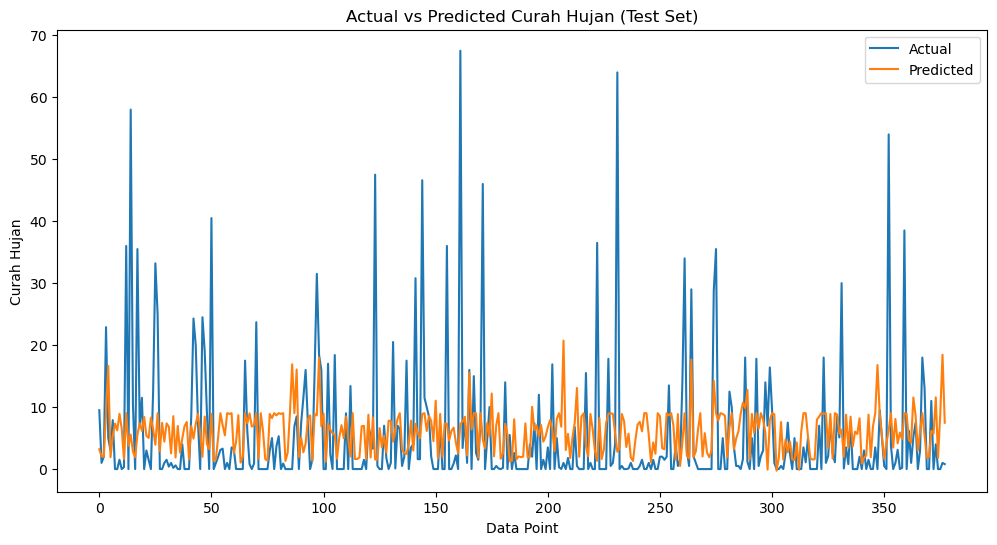

In [36]:
import matplotlib.pyplot as plt

# Plot grafik data prediksi vs data aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test_denormalized, label='Actual')
plt.plot(test_predictions_denormalized, label='Predicted')
plt.title('Actual vs Predicted Curah Hujan (Test Set)')
plt.xlabel('Data Point')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

In [38]:
import joblib

# Simpan model dengan joblib
joblib.dump(best_model, 'bestmodel_bpnn.joblib')

# Simpan scaler
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

print("Model and scalers have been saved.")

Model and scalers have been saved.


# 2.1 Pembangunan Model dengan Parameter Hasil GridSearchCV

Epoch 1/2500, Train Loss: 0.13896266495576626, Validation Loss: 0.14040652689425137, Train RMSE: 0.15565111734347137, Validation RMSE: 0.15537216980508778
Epoch 2/2500, Train Loss: 0.09641106969816106, Validation Loss: 0.08960132718138979, Train RMSE: 0.1557907859448747, Validation RMSE: 0.14697951441539542
Epoch 3/2500, Train Loss: 0.08875036918196853, Validation Loss: 0.08185307793147405, Train RMSE: 0.15075430135716494, Validation RMSE: 0.14199631182959135
Epoch 4/2500, Train Loss: 0.08657059902920239, Validation Loss: 0.08361323816742508, Train RMSE: 0.12325830615073927, Validation RMSE: 0.11817478105878797
Epoch 5/2500, Train Loss: 0.11532440348661244, Validation Loss: 0.11541397293745725, Train RMSE: 0.13657675377821005, Validation RMSE: 0.13466441829953346
Epoch 6/2500, Train Loss: 0.10126151083410584, Validation Loss: 0.10003165682090522, Train RMSE: 0.12804286485223898, Validation RMSE: 0.12470336139572599
Epoch 7/2500, Train Loss: 0.07928595959630629, Validation Loss: 0.07516

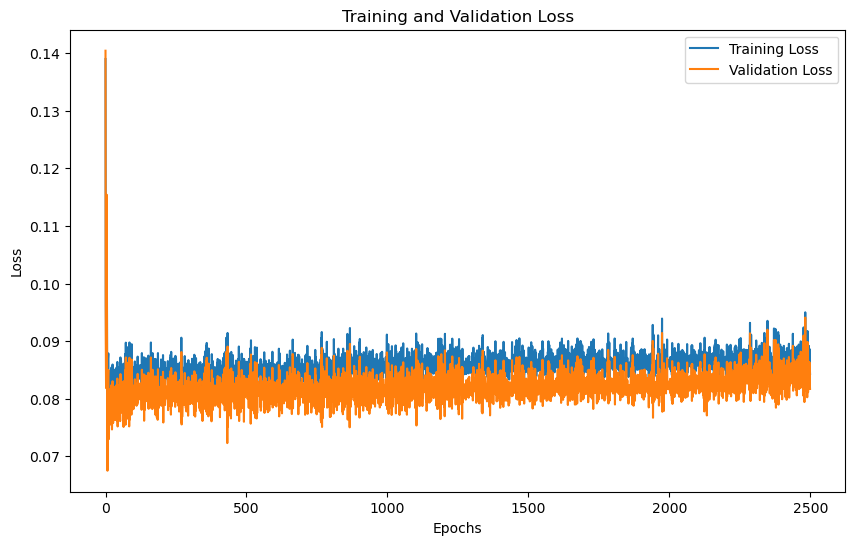

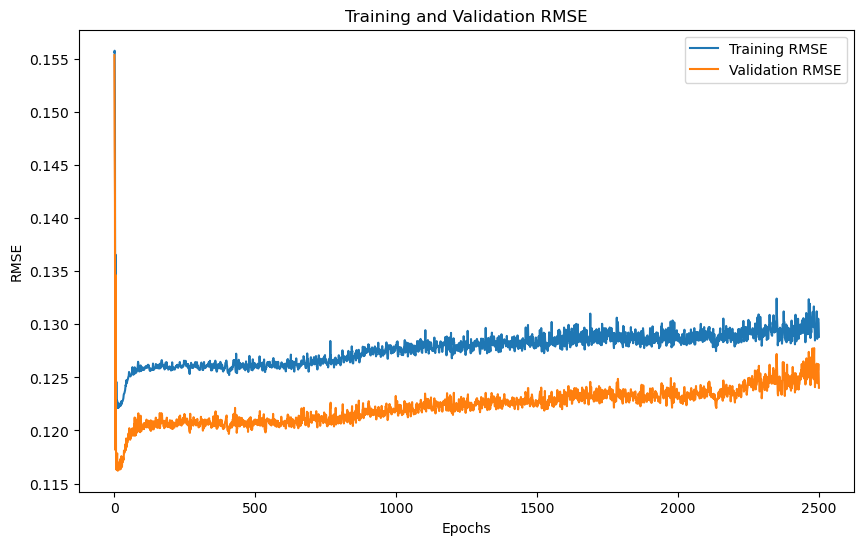

Training set RMSE: 0.12882438750222697
Test set RMSE: 0.12402069634995504


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_excel('dataset_ta.xlsx')

# Drop kolom tanggal
data = data.drop(columns=["Tgl/bln/thn"])

# Kolom target bernama 'curah_hujan' yang di drop di variabel x dan fitur-fiturnya adalah semua kolom yang tidak di drop pada variabel x.
X = data.drop(columns=['curah_hujan'])
y = data['curah_hujan']

# Normalisasi fitur-fitur dan target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Tentukan parameter terbaik yang diperoleh dari proses tuning parameter.
best_params = {
    'hidden_layer_sizes': (6, 7, 8),  
    'learning_rate_init': 0.01,  
    'max_iter': 2500               
}

# Tentukan model dengan parameter terbaik dari kode **best_params yang diambil dari parameter yang di tentukan di potongan kode program sebelumnya.
best_model = MLPRegressor(**best_params, solver='adam', warm_start=True)

# Bagi data menjadi set pelatihan dan set pengujian dengan train_test_split dan test_size 0.3 yang didapatkan dari tuning parameter.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Inisialisasi list untuk menyimpan loss dan RMSE
train_losses = []
val_losses = []
train_rmse_list = []
val_rmse_list = []

# Latih model dan simpan Loss Iteration
for i in range(best_params['max_iter']):
    best_model.partial_fit(X_train, y_train.ravel())
    
    train_pred = best_model.predict(X_train)
    val_pred = best_model.predict(X_test)
    
    train_loss = np.mean(np.abs(train_pred - y_train))
    val_loss = np.mean(np.abs(val_pred - y_test))
    
    train_rmse = np.sqrt(np.mean((train_pred - y_train) ** 2))
    val_rmse = np.sqrt(np.mean((val_pred - y_test) ** 2))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    
    # Print loss and RMSE for each epoch
    print(f"Epoch {i+1}/{best_params['max_iter']}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

# Evaluasi model
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_mae = np.mean(np.abs(train_predictions - y_train))
test_mae = np.mean(np.abs(test_predictions - y_test))

print(f"Training set Mean Absolute Error: {train_mae}")
print(f"Test set Mean Absolute Error: {test_mae}")

# Denormalisasi prediksi untuk interpretasi
train_predictions_denormalized = scaler_y.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions_denormalized = scaler_y.inverse_transform(test_predictions.reshape(-1, 1))
y_train_denormalized = scaler_y.inverse_transform(y_train)
y_test_denormalized = scaler_y.inverse_transform(y_test)

print(f"Denormalized predictions on training set: {train_predictions_denormalized[:5]}")
print(f"Denormalized predictions on test set: {test_predictions_denormalized[:5]}")
print(f"Denormalized actual values on training set: {y_train_denormalized[:5]}")
print(f"Denormalized actual values on test set: {y_test_denormalized[:5]}")

# Plot training dan validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training dan validation RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_list, label='Training RMSE')
plt.plot(val_rmse_list, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

print(f"Training set RMSE: {train_rmse_list[-1]}")
print(f"Test set RMSE: {val_rmse_list[-1]}")

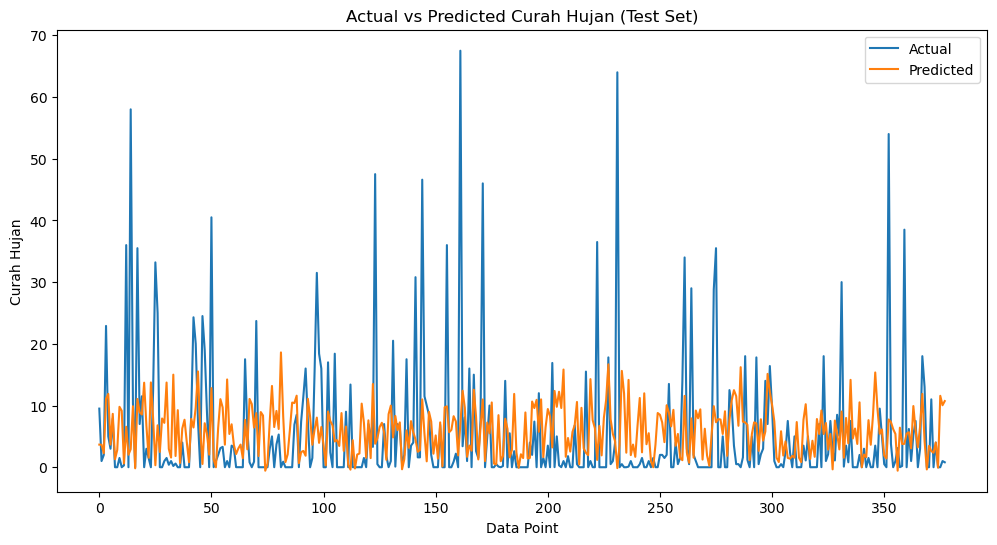

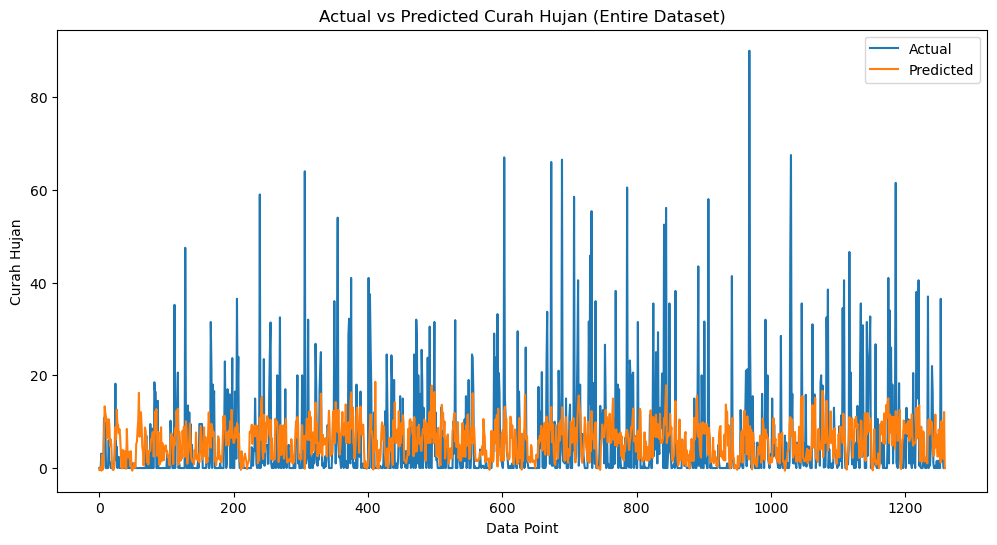

In [31]:
import matplotlib.pyplot as plt

# Plot data prediksi vs data aktual set pengujian
plt.figure(figsize=(12, 6))
plt.plot(y_test_denormalized, label='Actual')
plt.plot(test_predictions_denormalized, label='Predicted')
plt.title('Actual vs Predicted Curah Hujan (Test Set)')
plt.xlabel('Data Point')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

# Prediksi seluruh dataset
predictions = best_model.predict(X_scaled)
predictions_denormalized = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Plot data aktual vs data prediksi di seluruh dataset
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_denormalized, label='Predicted')
plt.title('Actual vs Predicted Curah Hujan (Entire Dataset)')
plt.xlabel('Data Point')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

In [33]:
import joblib

# Simpan model ke dalam joblib
joblib.dump(best_model, 'bpnn_model.joblib')

# simpan scaler
joblib.dump(scaler_X, 'bpnnscaler_X.joblib')
joblib.dump(scaler_y, 'bpnnscaler_y.joblib')

['bpnnscaler_y.joblib']

# 3. Pengoptimalan Model dengan XGBoost

Epoch 1/2500, Train Loss: 0.12708746031540874, Validation Loss: 0.11942437322162197, Train RMSE: 0.17865659781133894, Validation RMSE: 0.1695584403996036
Epoch 2/2500, Train Loss: 0.09930358622758695, Validation Loss: 0.09833456635058546, Train RMSE: 0.13193064550131778, Validation RMSE: 0.12917406400612766
Epoch 3/2500, Train Loss: 0.11508735087365791, Validation Loss: 0.11582854711491387, Train RMSE: 0.13990501755056614, Validation RMSE: 0.1389668036587342
Epoch 4/2500, Train Loss: 0.07982928574932141, Validation Loss: 0.07370117656832023, Train RMSE: 0.13458732474187518, Validation RMSE: 0.1270131120668378
Epoch 5/2500, Train Loss: 0.08092921609746848, Validation Loss: 0.07720268322105667, Train RMSE: 0.1276903667984076, Validation RMSE: 0.12171273526136386
Epoch 6/2500, Train Loss: 0.09704897546631264, Validation Loss: 0.09578112344366238, Train RMSE: 0.1288686013433919, Validation RMSE: 0.12556269551072521
Epoch 7/2500, Train Loss: 0.08260027049885671, Validation Loss: 0.079275007

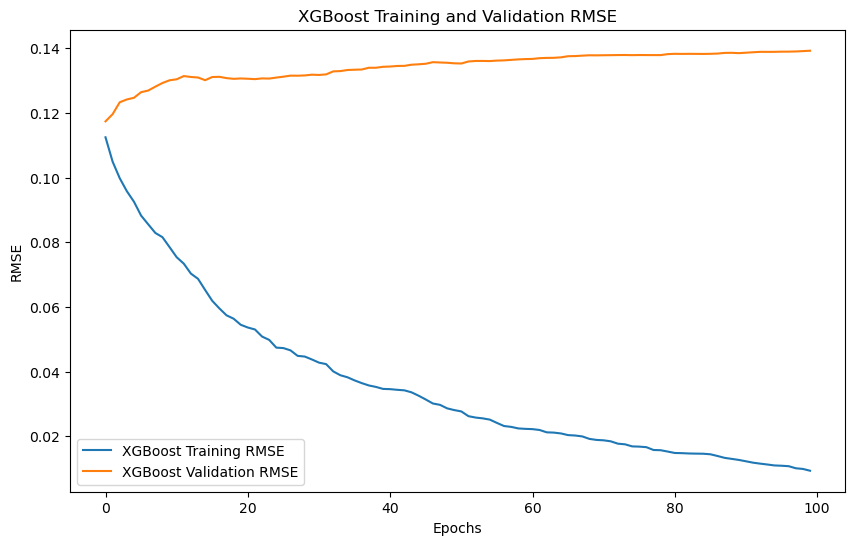

XGBoost Training set Mean Absolute Error: 0.10071452596973514
XGBoost Test set Mean Absolute Error: 0.0959303459437627
Denormalized XGBoost predictions on training set: [[1.2715716 ]
 [4.9796495 ]
 [1.1936623 ]
 [0.56989634]
 [8.64486   ]]
Denormalized XGBoost predictions on test set: [[-2.3437173 ]
 [ 5.7868915 ]
 [ 0.72062105]
 [17.047045  ]
 [15.154358  ]]


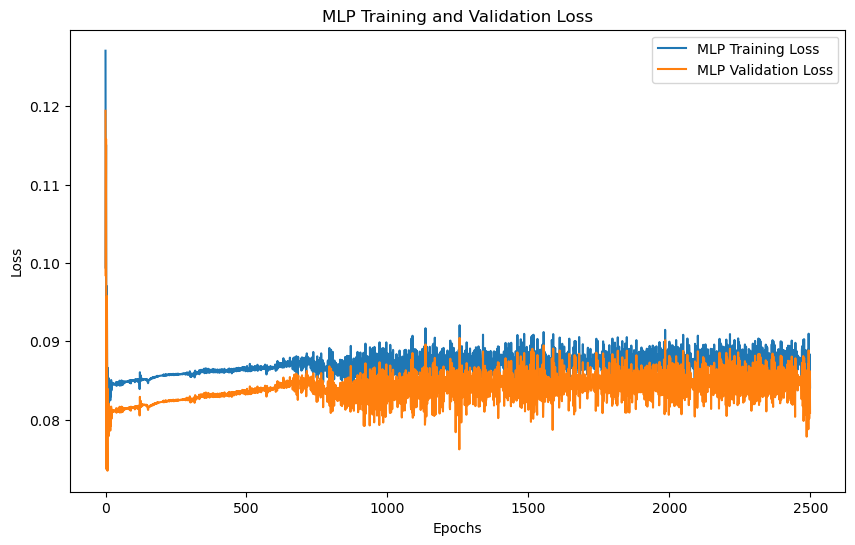

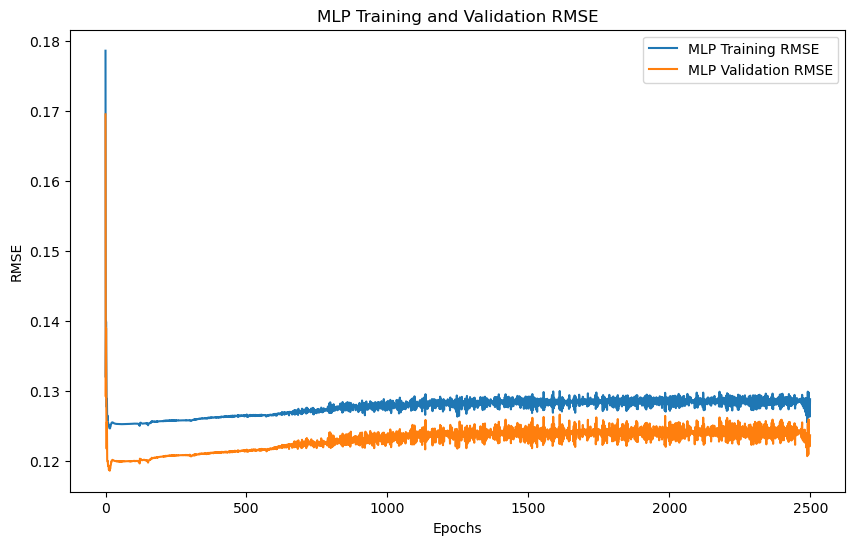

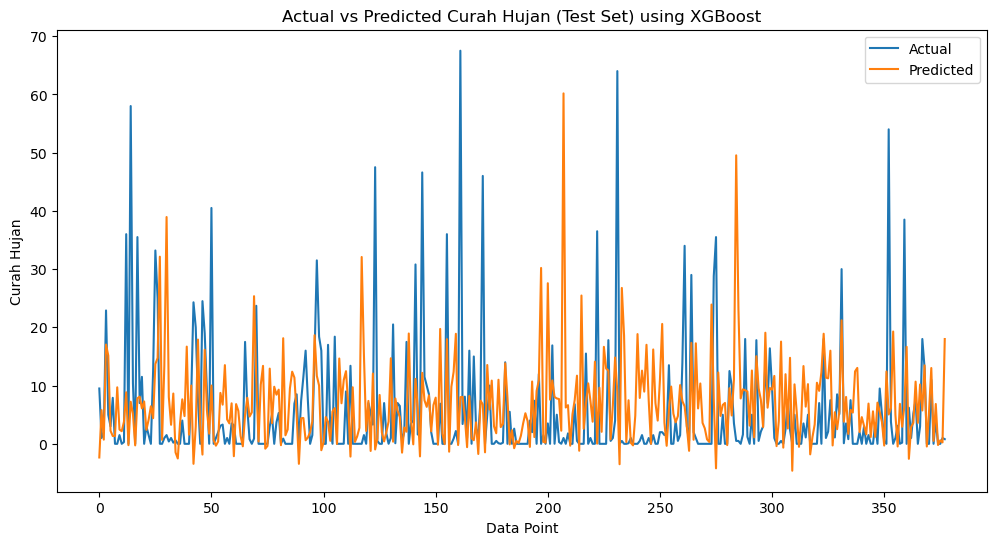

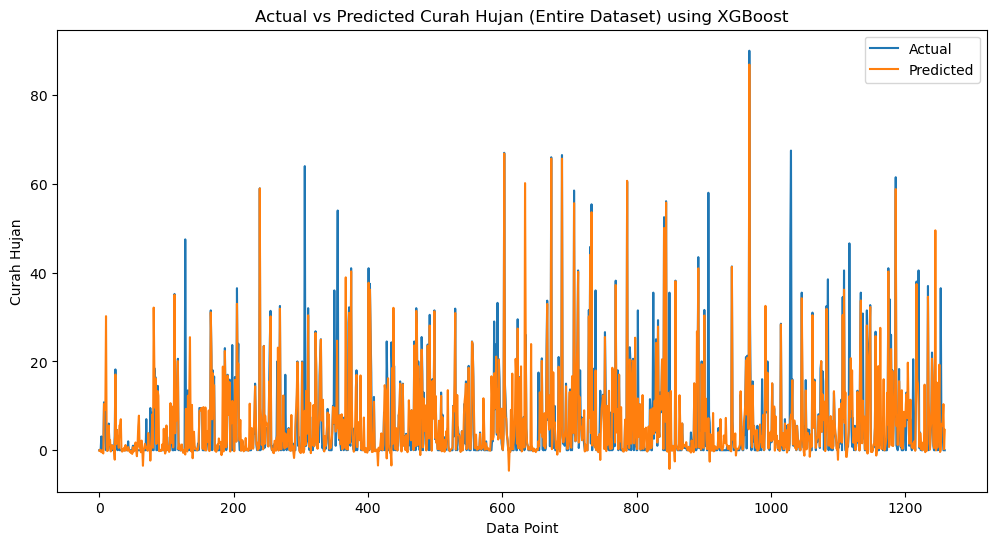

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
data = pd.read_excel('dataset_ta.xlsx')

# Drop date column
data = data.drop(columns=["Tgl/bln/thn"])

# Separate target and features
X = data.drop(columns=['curah_hujan'])
y = data['curah_hujan']

# Normalize features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Define best parameters from tuning
best_params = {
    'hidden_layer_sizes': (6, 7, 8),
    'learning_rate_init': 0.01,
    'max_iter': 2500,
    'random_state': 42
}

# Define the model with the best parameters
best_model = MLPRegressor(**best_params, solver='adam', warm_start=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Initialize lists to store loss and RMSE
train_losses = []
val_losses = []
train_rmse_list = []
val_rmse_list = []

# Train the model and store loss and RMSE per iteration
for i in range(best_params['max_iter']):
    best_model.partial_fit(X_train, y_train.ravel())
    
    train_pred = best_model.predict(X_train)
    val_pred = best_model.predict(X_test)
    
    train_loss = np.mean(np.abs(train_pred - y_train))
    val_loss = np.mean(np.abs(val_pred - y_test))
    
    train_rmse = np.sqrt(np.mean((train_pred - y_train) ** 2))
    val_rmse = np.sqrt(np.mean((val_pred - y_test) ** 2))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    
    # Print loss and RMSE for each epoch
    print(f"Epoch {i+1}/{best_params['max_iter']}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

# Evaluate the model
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_mae = np.mean(np.abs(train_predictions - y_train))
test_mae = np.mean(np.abs(test_predictions - y_test))

print(f"Training set Mean Absolute Error: {train_mae}")
print(f"Test set Mean Absolute Error: {test_mae}")

# Denormalize predictions for interpretation
train_predictions_denormalized = scaler_y.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions_denormalized = scaler_y.inverse_transform(test_predictions.reshape(-1, 1))
y_train_denormalized = scaler_y.inverse_transform(y_train)
y_test_denormalized = scaler_y.inverse_transform(y_test)

print(f"Denormalized predictions on training set: {train_predictions_denormalized[:5]}")
print(f"Denormalized predictions on test set: {test_predictions_denormalized[:5]}")
print(f"Denormalized actual values on training set: {y_train_denormalized[:5]}")
print(f"Denormalized actual values on test set: {y_test_denormalized[:5]}")

# Use MLPRegressor predictions as additional feature for XGBoost
train_predictions_full = best_model.predict(X_scaled)
X_scaled_with_mlp = np.hstack((X_scaled, train_predictions_full.reshape(-1, 1)))

# Split data again with new feature
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_scaled_with_mlp, y_scaled, test_size=0.3, random_state=42)

# Define and train XGBoost model with evaluation metric
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
eval_set = [(X_train_mlp, y_train_mlp), (X_test_mlp, y_test_mlp)]
xgb_model.fit(X_train_mlp, y_train_mlp, eval_set=eval_set, verbose=True)

# Extract evaluation results
results = xgb_model.evals_result()

# Plot training and validation loss for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='XGBoost Training RMSE')
plt.plot(results['validation_1']['rmse'], label='XGBoost Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE')
plt.legend()
plt.show()

# Evaluate XGBoost model
xgb_train_predictions = xgb_model.predict(X_train_mlp)
xgb_test_predictions = xgb_model.predict(X_test_mlp)

xgb_train_mae = np.mean(np.abs(xgb_train_predictions - y_train_mlp))
xgb_test_mae = np.mean(np.abs(xgb_test_predictions - y_test_mlp))

print(f"XGBoost Training set Mean Absolute Error: {xgb_train_mae}")
print(f"XGBoost Test set Mean Absolute Error: {xgb_test_mae}")

# Denormalize XGBoost predictions for interpretation
xgb_train_predictions_denormalized = scaler_y.inverse_transform(xgb_train_predictions.reshape(-1, 1))
xgb_test_predictions_denormalized = scaler_y.inverse_transform(xgb_test_predictions.reshape(-1, 1))

print(f"Denormalized XGBoost predictions on training set: {xgb_train_predictions_denormalized[:5]}")
print(f"Denormalized XGBoost predictions on test set: {xgb_test_predictions_denormalized[:5]}")

# Plot training and validation loss for MLPRegressor
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='MLP Training Loss')
plt.plot(val_losses, label='MLP Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation RMSE for MLPRegressor
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_list, label='MLP Training RMSE')
plt.plot(val_rmse_list, label='MLP Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('MLP Training and Validation RMSE')
plt.legend()
plt.show()

# Plot actual vs predicted values on test set for XGBoost
plt.figure(figsize=(12, 6))
plt.plot(y_test_denormalized, label='Actual')
plt.plot(xgb_test_predictions_denormalized, label='Predicted')
plt.title('Actual vs Predicted Curah Hujan (Test Set) using XGBoost')
plt.xlabel('Data Point')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

# Predict entire dataset with XGBoost
xgb_predictions_full = xgb_model.predict(X_scaled_with_mlp)
xgb_predictions_denormalized = scaler_y.inverse_transform(xgb_predictions_full.reshape(-1, 1)).flatten()

# Plot actual vs predicted values on entire dataset
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual')
plt.plot(xgb_predictions_denormalized, label='Predicted')
plt.title('Actual vs Predicted Curah Hujan (Entire Dataset) using XGBoost')
plt.xlabel('Data Point')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

In [14]:
# Save the trained models
joblib.dump(xgb_model, 'xgb_bpnnmodel.joblib')

# Simpan model MLPRegressor
joblib.dump(best_model, 'mlp_regressor_model.joblib')

['mlp_regressor_model.joblib']

In [11]:
# Simpan scaler yang telah dilatih
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

['scaler_y.joblib']